In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [2]:
accident_df = pd.read_excel('cahr2.xlsx', engine='openpyxl')

In [3]:
accident_df


,cause,place,collision,season,acc_time,severity
0,6,1,5,1,4,2
1,8,1,1,1,4,2
2,8,1,5,1,4,2
3,8,1,1,1,4,2
4,8,1,1,1,4,2
...,...,...,...,...,...,...
4149,1,1,5,3,1,2
4150,1,1,1,3,1,2
4151,3,1,1,3,1,2
4152,2,1,1,3,1,1


In [4]:
X = accident_df.drop(['severity'], axis=1)

In [5]:
X

,cause,place,collision,season,acc_time
0,6,1,5,1,4
1,8,1,1,1,4
2,8,1,5,1,4
3,8,1,1,1,4
4,8,1,1,1,4
...,...,...,...,...,...
4149,1,1,5,3,1
4150,1,1,1,3,1
4151,3,1,1,3,1
4152,2,1,1,3,1


In [6]:
y = accident_df['severity']

In [7]:
X.shape


(4154, 5)

In [8]:
y.shape


(4154,)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled

array([[0.625     , 0.        , 0.8       , 0.        , 1.        ],
       [0.875     , 0.        , 0.        , 0.        , 1.        ],
       [0.875     , 0.        , 0.8       , 0.        , 1.        ],
       ...,
       [0.25      , 0.        , 0.        , 0.66666667, 0.        ],
       [0.125     , 0.        , 0.        , 0.66666667, 0.        ],
       [0.875     , 0.        , 0.        , 0.66666667, 0.        ]])

In [13]:
y= y.values.reshape(-1,1)

In [14]:
y_scaled = scaler.fit_transform(y)

In [15]:
y_scaled

array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0. ],
       [0.5]])

In [16]:
accident_df['severity'].unique()

array([2, 1, 3], dtype=int64)

In [17]:
X_scaled.shape

(4154, 5)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size= 0.25, random_state=120)

In [19]:
X_train.shape


(3115, 5)

In [20]:
import tensorflow
y_train = tensorflow.keras.utils.to_categorical(y_train, 3)
y_test = tensorflow.keras.utils.to_categorical(y_test, 3)

In [21]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='relu'))

model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9787 (38.23 KB)
Trainable params: 9787 (3

In [22]:
import tensorflow 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [23]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])


In [24]:
epochs_hist = model.fit(X_train, y_train, epochs=80, batch_size=17,  verbose=1, validation_split=0.15)


Epoch 1/80


156/156 [==============================] - 1s 3ms/step - loss: 0.1340 - accuracy: 0.7197 - val_loss: 0.1196 - val_accuracy: 0.7479
Epoch 2/80
156/156 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.7454 - val_loss: 0.1117 - val_accuracy: 0.7585
Epoch 3/80
156/156 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.7684 - val_loss: 0.1072 - val_accuracy: 0.7479
Epoch 4/80
156/156 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.7699 - val_loss: 0.1041 - val_accuracy: 0.7756
Epoch 5/80
156/156 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.7752 - val_loss: 0.1007 - val_accuracy: 0.7735
Epoch 6/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.7786 - val_loss: 0.0995 - val_accuracy: 0.7671
Epoch 7/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.7873 - val_loss: 0.0971 - val_accuracy: 0.7692
Epoc

Epoch 55/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.8085 - val_loss: 0.0907 - val_accuracy: 0.7692
Epoch 56/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.8119 - val_loss: 0.0888 - val_accuracy: 0.8077
Epoch 57/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.8100 - val_loss: 0.0905 - val_accuracy: 0.7949
Epoch 58/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.8047 - val_loss: 0.0900 - val_accuracy: 0.7970
Epoch 59/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.8111 - val_loss: 0.0896 - val_accuracy: 0.7970
Epoch 60/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.8122 - val_loss: 0.0910 - val_accuracy: 0.7970
Epoch 61/80
156/156 [==============================] - 0s 2ms/step - loss: 0.0831 - accuracy: 0.8145 - val_loss: 0.0942 - val_accuracy: 0.7671

In [25]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


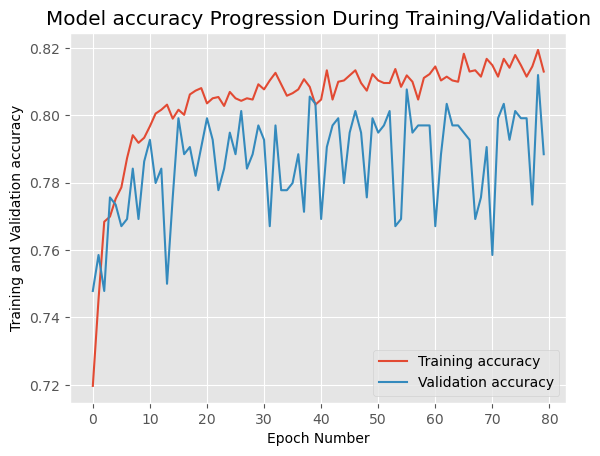

In [26]:
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])

plt.title('Model accuracy Progression During Training/Validation')
plt.ylabel('Training and Validation accuracy')
plt.xlabel('Epoch Number')
plt.legend(['Training accuracy', 'Validation accuracy'])

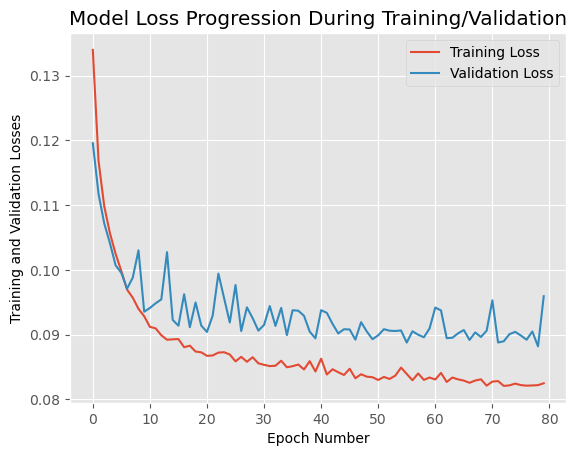

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [59]:
from sklearn.preprocessing import LabelEncoder

severity = LabelEncoder().fit_transform(accident_df.severity.values)
data = accident_df.drop(['severity'], axis=1)
data.head()

,cause,place,collision,season,acc_time
0,6,1,5,1,4
1,8,1,1,1,4
2,8,1,5,1,4
3,8,1,1,1,4
4,8,1,1,1,4


In [60]:
cause = [f"cause{i}" for i in accident_df.cause.unique()]
place = [f"place_{i}" for i in accident_df.place.unique()]
collision = [f"collision_{i}" for i in accident_df.collision.unique()]
season = [f"season{i}" for i in accident_df.season.unique()]
acc_time = [f"acc_time{i}" for i in accident_df.acc_time.unique()]

In [61]:
from sklearn.preprocessing import OneHotEncoder
data[cause] = OneHotEncoder().fit_transform(accident_df.cause.values.reshape(-1, 1)).toarray()
data[place] = OneHotEncoder().fit_transform(accident_df.place.values.reshape(-1, 1)).toarray()
data[collision] = OneHotEncoder().fit_transform(accident_df.collision.values.reshape(-1, 1)).toarray()
data[season] = OneHotEncoder().fit_transform(accident_df.season.values.reshape(-1, 1)).toarray()
data[acc_time] = OneHotEncoder().fit_transform(accident_df.acc_time.values.reshape(-1, 1)).toarray()

data = data.drop(["cause", "place", "collision", "season" , "acc_time"], axis=1)
print(data.shape)
data.head()

(4154, 25)


,cause6,cause8,cause4,cause5,cause3,cause1,cause2,cause9,cause7,place_1,place_2,collision_5,collision_1,collision_3,collision_6,collision_4,collision_2,season1,season2,season3,season4,acc_time4,acc_time3,acc_time2,acc_time1
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
print(type(y_train))

<class 'numpy.ndarray'>


In [63]:
severity = tensorflow.one_hot(severity, 3, dtype=tensorflow.int64)
ann_data = data.values.reshape(data.shape[0], -1, data.shape[1])
print(ann_data.shape)

(4154, 1, 25)


In [76]:
squeeze_data = np.squeeze(ann_data)
squeeze_data.shape

(4154, 25)

In [77]:
targets = np.argmax(severity, -1)
features = data.columns.values

cause6: -->  Score: 0.04488695236029271
cause8: -->  Score: 0.015037082038657532
cause4: -->  Score: 0.014205902803493407
cause5: -->  Score: 0.01717124295113708
cause3: -->  Score: 0.006203073201603925
cause1: -->  Score: 0.012905093839520985
cause2: -->  Score: 0.009743136317395616
cause9: -->  Score: 0.017713426681006745
cause7: -->  Score: 0.016911491441435108
place_1: -->  Score: 0.012230713426755236
place_2: -->  Score: 0.0
collision_5: -->  Score: 0.023356341830834758
collision_1: -->  Score: 0.03998344088590372
collision_3: -->  Score: 0.0067752838362695
collision_6: -->  Score: 0.012975449026095836
collision_4: -->  Score: 0.19827026913869028
collision_2: -->  Score: 0.03515652539042745
season1: -->  Score: 0.006783272410262785
season2: -->  Score: 0.03081210485094955
season3: -->  Score: 0.04837201988516344
season4: -->  Score: 0.023561404729160067
acc_time4: -->  Score: 0.007730406025743805
acc_time3: -->  Score: 0.007754284503481817
acc_time2: -->  Score: 0.0799452721226779

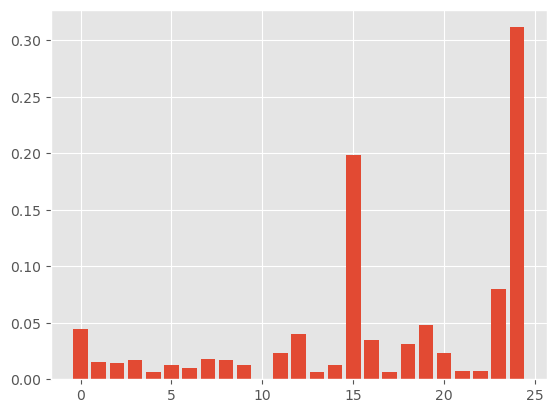

In [78]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(squeeze_data, targets)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print(f'{features[i]}: -->  Score: {v}')
plt.bar([x for x in range(len(importance))], importance)
plt.show()